In [1]:
# 데이터 구조 확인
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0EDB-6129

 C:\Users\IS_LAB_05\Documents\Gan_study 디렉터리

2022-01-23  오후 09:00    <DIR>          .
2022-01-23  오후 09:00    <DIR>          ..
2022-01-23  오후 08:14    <DIR>          .ipynb_checkpoints
2022-01-23  오후 05:08             8,606 01. torch_Basic .ipynb
2022-01-23  오후 09:00           172,607 02. First NW(with pytorch).ipynb
2022-01-23  오후 06:11    <DIR>          data
2022-01-19  오후 05:12                16 README.md
               3개 파일             181,229 바이트
               4개 디렉터리  354,130,706,432 바이트 남음


In [2]:
%ls data -al
#mnist_test.csv
#mnist_train.csv 받아오기

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0EDB-6129

 C:\Users\IS_LAB_05\Documents\Gan_study\data 디렉터리

2022-01-23  오후 06:11    <DIR>          .
2022-01-23  오후 06:11    <DIR>          ..
2022-01-23  오후 06:11        18,289,443 mnist_test.csv
2022-01-23  오후 06:10       109,575,994 mnist_train.csv
               2개 파일         127,865,437 바이트

 C:\Users\IS_LAB_05\Documents\Gan_study 디렉터리



파일을 찾을 수 없습니다.


In [3]:
import pandas as pd
# 데이터는 상대경로로 받아오는것, 로컬 pc 프로젝트가 있는 경로에 있어야 함
df_test = pd.read_csv('data\mnist_test.csv',header=None)
df_train= pd.read_csv('data\mnist_train.csv',header=None)

In [4]:
# 가져온 data 확인하기
df_train.head() # 데이터의 각 행은 총 785개의 값으로 이루어져 있음

# 맨 앞의 index[0]의 값은 각 이미지의 정답이며, 나머지 784개는 28*28의 픽셀 이미지

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_train.info() # 학습데이터의 총 개수는 60,000개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 59.9 MB


# 이미지 시각화 해보기
 - `matplotlib.pyplot` 사용하기

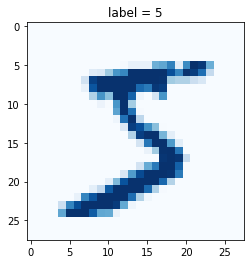

In [7]:
import matplotlib.pyplot as plt
# 첫번째 이미지 확인해 보기
# 데이터프레임으로부터 데이터 할당
row = 0
data = df_train.iloc[row]

# 첫 번째 값은 레이블, 각 이미지의 정답을 말함
label = data[0]

# 이미지 데이터는 나머지 784개의 값
img = data[1:].values.reshape(28,28) # 1x784 를 28*28 로 reshape
plt.title("label = " + str(label))
plt.imshow(img, interpolation='none', cmap='Blues')
plt.show()

# 결과 5 는  4번째 실행결과 output에서 첫번째 index 열을 보면 확인할 수 있다.
# 0번째 이미지의 정답은 5

# 간단한 신경망 만들기
<br>

## 실험 이미지 구성 및 전제
<br>

### 실험 이미지
 - 이미지 df_train / df_test는 784(28*28 의 이미지를 1열로 늘여놓음)로 구성되어 있음
 - 따라서 신경망의 맨 처음 입력 레이어는 784개의 노드를 가지고 있어야함
 - 맨 마지막 레이어는 0~ 9까지의 이미지중 하나로 분류해야 하기에 총 10개의 output으로 나와야 함
<br>

### 실험 전제
 - 가운데 신경망의 크기는 대략 200으로 놓고 감
 - 한 레이어의 노드는 다음 레이어의 노드와 모두 연결되어 있음 ***왼전연결*** 되어 있음
 - 출력층과 밀집층(은닉층)에 사용될 활성함수 는 로지스틱 함수로 선정

In [8]:
import torch
import torch.nn as nn

# 분류기 만들기
# 분류기는 nn.Module로부터 상속을 받음

class Classifier(nn.Module):
    
    # 부모클래스 초기화
    # 객체가 처음 만들어질때 호출되는 함수로
    # 처음 객체를 만들 때 필요한 초기화 작업을 함
    def __init__(self):
        # 부모클래스의 생성자 호출
        super().__init__()
        
        # 신경망 레이어 정의
        # 리스트의 형태로 레이어 정의
        self.model = nn.Sequential(
            # 784개의 노드로부터 200개의 노드의
            # 완전연결 매핑
            nn.Linear(784,200),
            # 200개의 노드에 활성함수 로지스틱 활성함수 선정
            nn.Sigmoid(),
            # 200개의 노드를 10개의 노드로 연결 
            # 은닉층과 10개의 노드출력 게이어 간 가중치 포함됨 
            nn.Linear(200,10),
            # 10개의 출력에 대한 활성함수
            nn.Sigmoid()
        )
        
        ## 여기까지가 신경망의 정보들이 어떻게 정방향으로 흐르는지 정의함
        ## bt 오차를 어떻게 처리하여 학습파라미터를 업데이트 할 건지는 정의하지 않음
        
        # 평균제곱 오차 사용하기 ( 실제와 예측값의 차이를 계싼하여 제곱 후 평균을 계산한 것)
        # torch.nnMESLoss() 로 제공함
        self.loss_function = nn.MSELoss()

        
        # 손실을 이용해 네트워크의 가중치 수정하기,
        # 확률적 경사하강법 (SGD) 사용, 학습률 = 0.01
        # SGD 옵티마이저에 모든 학습 파라미터를 self.parameters()를 통해 넘길 수 있음
        self.optimiser = torch.optim.SGD(self.parameters(),lr=0.01)
        
        # train에서 사용될 counter, progress 초기화
        self.counter = 0
        self.progress = []

        pass
        
    # 파이토치에서 네트워크에서 정보를 전달하는데에 forward() 함수를 사용해야 함 
    def forward(self,inputs):
        # 모델 실행
        return self.model(inputs)
        # 흐름 : 입력값을 받아 nn.Sequential() 에서 정의한
        # self.model() 로 전달함. 모델의 결과는 forward()를 호출한 곳으로 전달됨
    
    
    # 네트워크 훈련하기 
    # train 함수는 신경망에 전달할 입력이 필요하며
    # 출력값이 필요하다. 이를통해 손실 계산
    def train(self, inputs, targets):
        # 신경망의 결과 계산
        outputs = self.forward(inputs)
        
        # 손실 계산
        loss = self.loss_function(outputs, targets)

        # 카운터를 증가시키고 10회마다 오차 저장
        # 모니터링 편하게 10개 훈련 샘플마다 손실값 저ㅏㅇ
        self.counter += 1
        if (self.counter % 10 == 0):
            self.progress.append(loss.item())
            pass
        if (self.counter % 10000 == 0):
            print("counter = ", self.counter)
            pass

        # 기울기 초기화, 역전파 실행, 가중치 갱신
        # 각 노드마다 오차 기울기를 계싼, 그 노드에 연결된
        # 가중치들을 수정하는 과정
        
        # 계산그래프의 기울기는 모두 0으로 초기화 됨
        # 이렇게하지 않으면 loss.backward()를 따라 계산시
        # 값이 쌓이게 됨
        self.optimiser.zero_grad()
        # 신경망의 기울기 계산
        loss.backward()
        # 신경망의 학습 파라미터 갱신
        self.optimiser.step()

        pass
    
    # 그림으로 표현하기 위함 
    def plot_progress(self):
        df = pandas.DataFrame(self.progress, columns=['loss'])
        df.plot(ylim=(0, 1.0), figsize=(16,8), alpha=0.1, marker='.', grid=True, yticks=(0, 0.25, 0.5))
        pass
    
    pass

# Dataset 클래스

In [9]:
# 데이터셋 클래스
from torch.utils.data import Dataset

import pandas
import matplotlib.pyplot as plt

class MnistDataset(Dataset):
    
    def __init__(self, csv_file):
        self.data_df = pandas.read_csv(csv_file, header=None)
        pass
    
    def __len__(self):
        return len(self.data_df)
    
    def __getitem__(self, index):
        # 이미지 목표(레이블)
        label = self.data_df.iloc[index,0]
        target = torch.zeros((10))
        target[label] = 1.0
        
        # 0-255의 이미지를 0-1로 정규화
        image_values = torch.FloatTensor(self.data_df.iloc[index,1:].values) / 255.0
        
        # 레이블, 이미지 데이터 텐서, 목표 텐서 반환
        return label, image_values, target
    
    def plot_image(self, index):
        img = self.data_df.iloc[index,1:].values.reshape(28,28)
        plt.title("label = " + str(self.data_df.iloc[index,0]))
        plt.imshow(img, interpolation='none', cmap='Blues')
        pass
    
    pass

In [10]:
mnist_dataset =MnistDataset('data\mnist_train.csv')

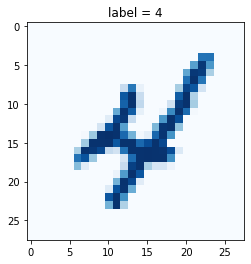

In [11]:
mnist_dataset.plot_image(9)

In [12]:
# 데이터셋 클래스가 인덱스로 접근할수 있고, 레이블과 이미지 및 목표 텐서를 반환하는지 확인

mnist_dataset[100]

(5,
 tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000,

# 분류기 학습시키기


In [13]:
%%time 
# 신경망 생성

C = Classifier()

# MNIST 데이터에 대해 훈련 진행 

epochs = 4

for i in range(epochs):
    print('training epoch', i+1, "of", epochs)
    # 네트워크 훈련 진행
    for label, image_data_tensor, target_tensor in mnist_dataset:
        C.train(image_data_tensor, target_tensor)
        pass
    pass

training epoch 1 of 4
counter =  10000
counter =  20000
counter =  30000
counter =  40000
counter =  50000
counter =  60000
training epoch 2 of 4
counter =  70000
counter =  80000
counter =  90000
counter =  100000
counter =  110000
counter =  120000
training epoch 3 of 4
counter =  130000
counter =  140000
counter =  150000
counter =  160000
counter =  170000
counter =  180000
training epoch 4 of 4
counter =  190000
counter =  200000
counter =  210000
counter =  220000
counter =  230000
counter =  240000
Wall time: 2min 35s


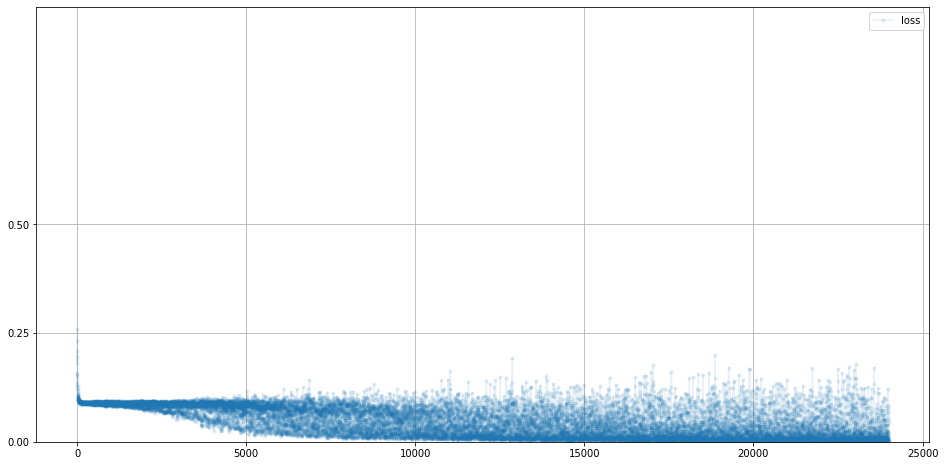

In [14]:
# 분류기 오차 출력

C.plot_progress()
# 결과를 통해 손실값이 빠르게 떨어지며, 0을 향해 노이즈가 있는 상태로 느리게 훈련이 되는것을 알 수 있음 -> 0을 향해 가니 
# 학습이 매우 좋다 라는것을 알 수 있음

# 신경망에 쿼리 하기
 - 앞서서는 모델을 훈련시키는 용도로 사용
 - 이번부터는 이미지를 실제로 분류할 수 있는지 테스트
 - 데이터의 경우 앞에서 정의한 df_test 를 사용

In [15]:
df_test = MnistDataset('data\mnist_test.csv') # 테스트 데이터 셋

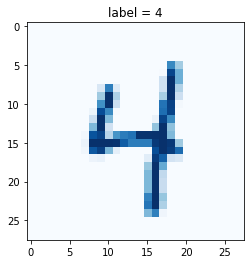

In [16]:
# 이미지 확인해 보기
df_test.plot_image(19)

<AxesSubplot:>

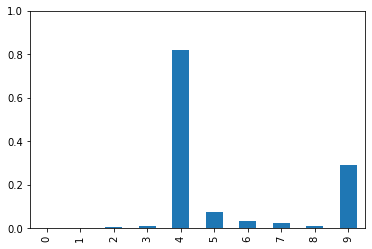

In [17]:
# 훈련한 신경망에 이 이미지에 대해 어떻게 인식하는지 확인해보기

# 인덱스 19의 레코드에서 이미지 픽셀값들을 추출,
# image_data에 값 저장하기
# 19번째 이미지에 대한 값
image_data = df_test[19][1]

# 훈련된 신경망으로부터 쿼리
# forward() 함수를 이용해 전달됨
output = C.forward(image_data)

# 출력 텐서 플롯 
# 전체의 숫자데이터에대해 plot으로 확률에 대한 퍼센트를 반환한다.
pandas.DataFrame(output.detach().numpy()).plot(kind='bar', legend=False, ylim=(0,1))

# 분류기의 성능

In [18]:
# 훈련된 신경망을 테스트 데이터셋에 대해 테스트

score = 0
items = 0

for label, image_data_tensor, target_tensor in df_test:
    answer = C.forward(image_data_tensor).detach().numpy()
    if (answer.argmax() == label):
        score += 1
        pass
    items += 1
    
    pass

print("정확도:", score, "테스트데이터 개수: ", items, "아이템 대비 정확도: ", score/items)

정확도: 8812 테스트데이터 개수:  10000 아이템 대비 정확도:  0.8812
